<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Jaffna_HCHO_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING GENERAL LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive

#**LOADING DATASET**


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Colombo_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/colombo_joined_data.csv')
Kandy_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/kandy_joined_data.csv')
Nuwara_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/nuwara_joined_data.csv')
Monaragala_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/monaragala_joined_data.csv')
Matara_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/matara_joined_data.csv')
Kurunegala_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/kurunegala_joined_data.csv')
Jaffna_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/jaffna_joined_data.csv')


#**PREPARING DATASET FOR ANAYSIS**


In [ ]:
# Assuming 'date' column is in string format
Jaffna_data['date'] = pd.to_datetime(Jaffna_data['date'])


In [ ]:
Jaffna_data.set_index('date', inplace=True)

In [ ]:
Jaffna_data.rename(columns={'HCHO reading': 'HCHO_reading'}, inplace=True)

#**DESCRIBING DATA**


In [ ]:
Jaffna_data.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading,Location,Current Date,Next Date,month
date,,,,,,,,,,,,,,,
2019-01-01,25.09,25.87,14.47,73.62,0.00,101.53,7.12,42.00,8.51,42.06,0.000058,Jaffna Proper,2019-01-01,2019-01-02,2019-01
2019-01-02,25.07,25.80,13.98,71.19,0.00,101.52,6.40,41.50,7.63,41.69,0.000102,Jaffna Proper,2019-01-02,2019-01-03,2019-01
2019-01-03,25.35,25.76,13.73,68.88,0.00,101.56,6.78,38.44,8.16,38.56,0.000039,Jaffna Proper,2019-01-03,2019-01-04,2019-01
2019-01-04,25.31,25.64,13.79,69.12,0.00,101.50,6.95,46.00,8.39,46.06,0.000000,Jaffna Proper,2019-01-04,2019-01-05,2019-01
2019-01-05,25.55,25.86,15.14,74.62,0.03,101.37,6.30,37.00,7.52,37.31,0.000159,Jaffna Proper,2019-01-05,2019-01-06,2019-01


In [ ]:
Jaffna_data.describe()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading
count,1826.00000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,28.30374,29.076429,18.647010,77.763143,4.170789,100.829184,6.036424,154.237749,7.071878,154.516961,0.000109
std,1.32481,1.550165,1.552041,5.071207,9.153512,0.248425,2.158227,81.261165,2.536439,81.351522,0.000064
min,24.26000,25.500000,13.370000,58.940000,0.000000,100.160000,0.980000,10.120000,1.110000,10.440000,0.000000
25%,27.30000,27.940000,17.940000,74.575000,0.120000,100.640000,4.522500,64.297500,5.280000,64.530000,0.000070
50%,28.45500,29.200000,18.980000,78.000000,0.735000,100.810000,6.015000,196.720000,7.090000,196.405000,0.000101
75%,29.30000,30.080000,19.650000,81.060000,3.737500,101.010000,7.520000,225.810000,8.850000,226.362500,0.000138
max,31.29000,33.770000,22.400000,91.940000,106.880000,101.560000,13.010000,347.880000,15.300000,348.380000,0.000368


In [ ]:
features_to_remove = ['Location',	'Current Date', 	'Next Date', 	'month']
Jaffna_data = Jaffna_data.drop(features_to_remove, axis=1)

#**CHECKING EACH COLUMN OF DATA**


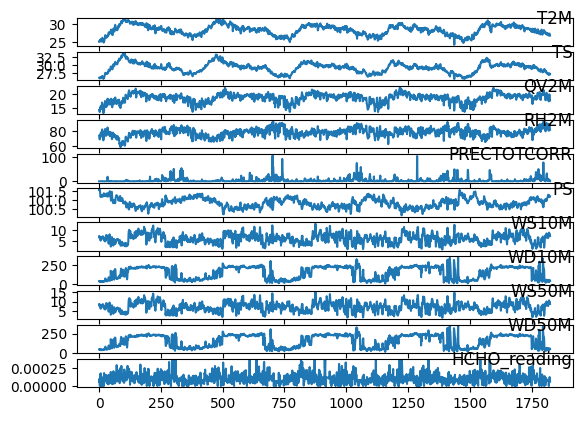

In [ ]:
from matplotlib import pyplot as plt

values = Jaffna_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Jaffna_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

#**HCHO READING VS DATE**


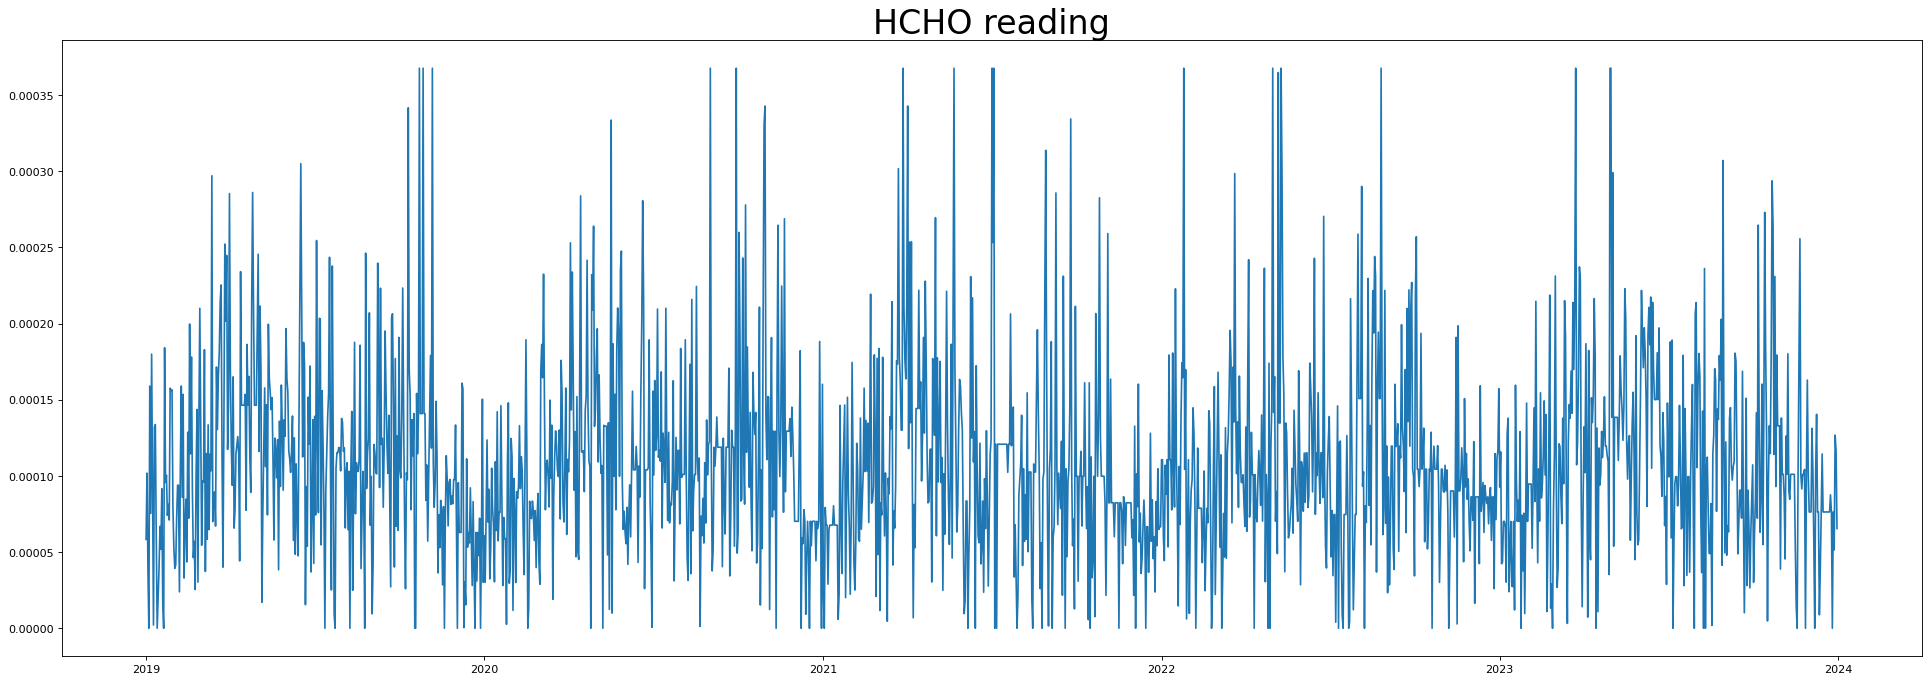

In [ ]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)

plt.plot(Jaffna_data.HCHO_reading)

#**USING SEASONAL DECOMPOSE TO IDENTIFY TREND AND SEASONALITY**


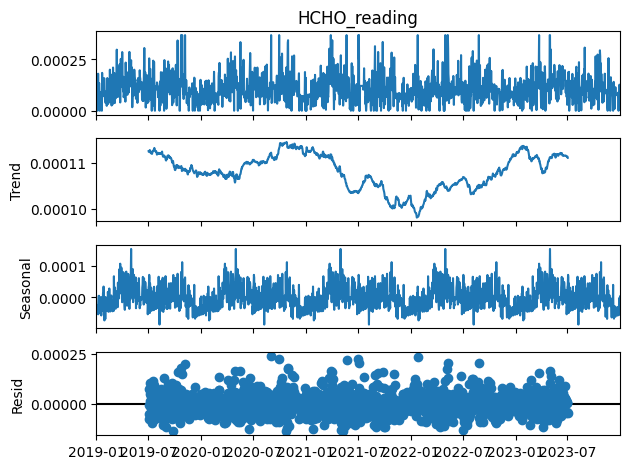

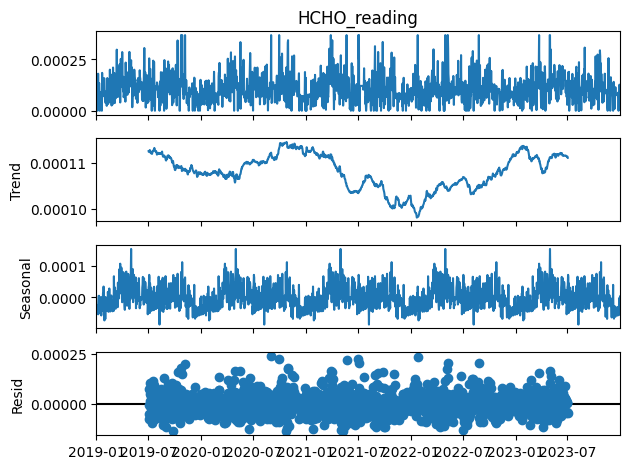

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = Jaffna_data.HCHO_reading
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

#**PLOTING HCHO ROLLING MEAN AND ROLLING STANDARD DEVIATION (WINDOW=30)**


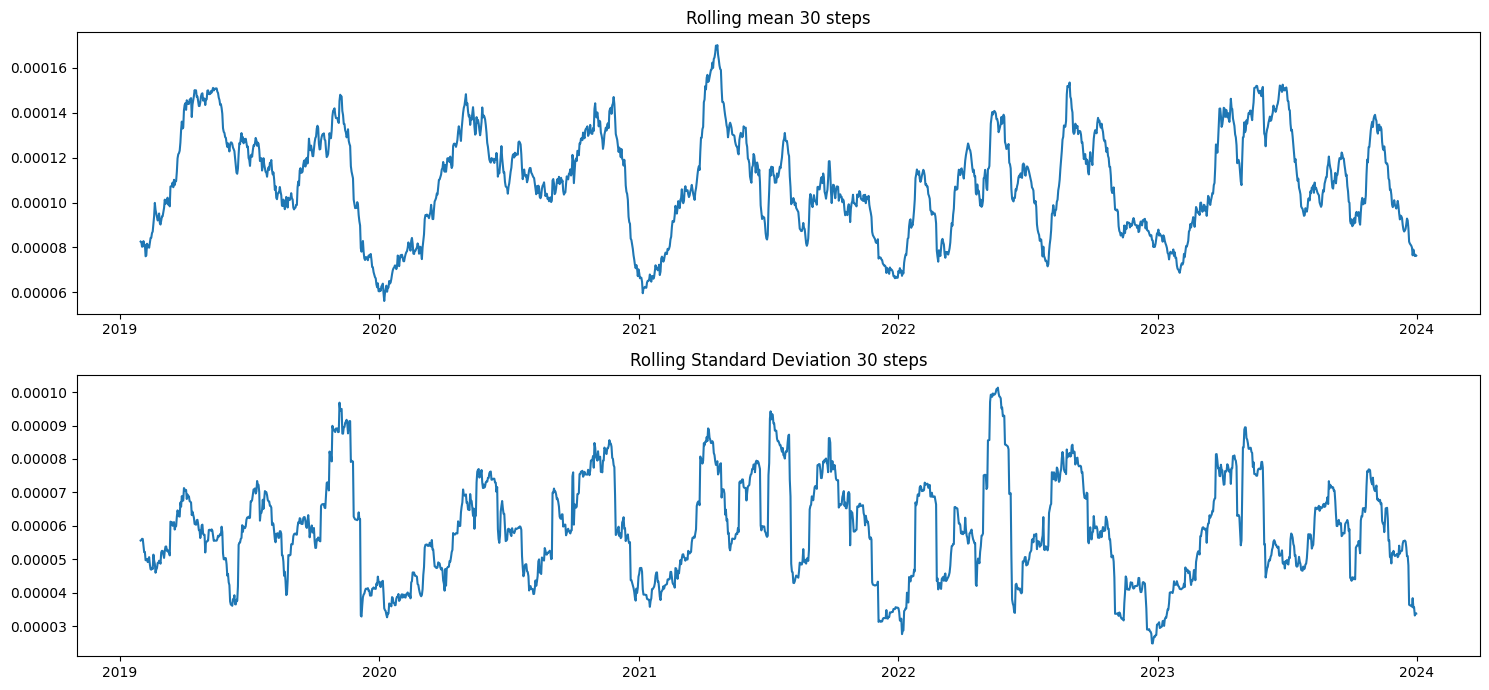

In [ ]:
import numpy as np

fig = plt.figure(figsize=(15, 7))
layout = (2, 2)
mv_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
std_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

mm = Jaffna_data.HCHO_reading.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("Rolling mean 30 steps")

std = Jaffna_data.HCHO_reading.rolling(30).std()
std_ax.plot(std)
std_ax.set_title("Rolling Standard Deviation 30 steps")

plt.tight_layout()

#**HCHO WEEKLY MEAN VS DATE**


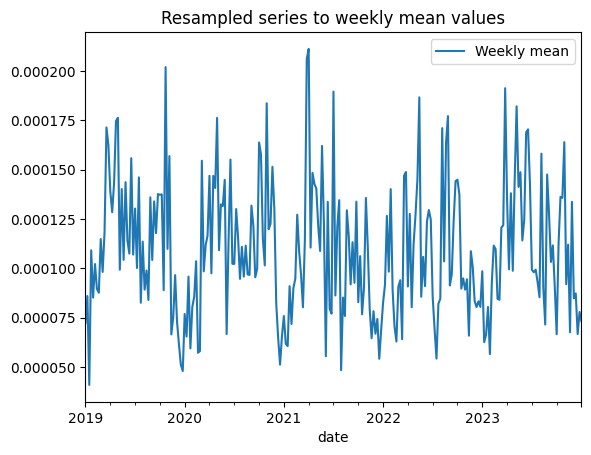

In [ ]:
# Looking for weekly seasonality
resample = Jaffna_data.resample('W')
weekly_mean = resample.mean()
weekly_mean.HCHO_reading.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

#**POLYNOMIAL FIT**


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-15-a18f885da6b0>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


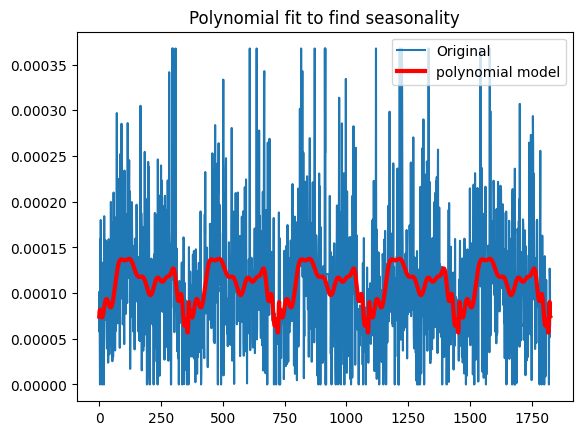

In [ ]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = Jaffna_data.HCHO_reading.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

#**FINDING NOISE**


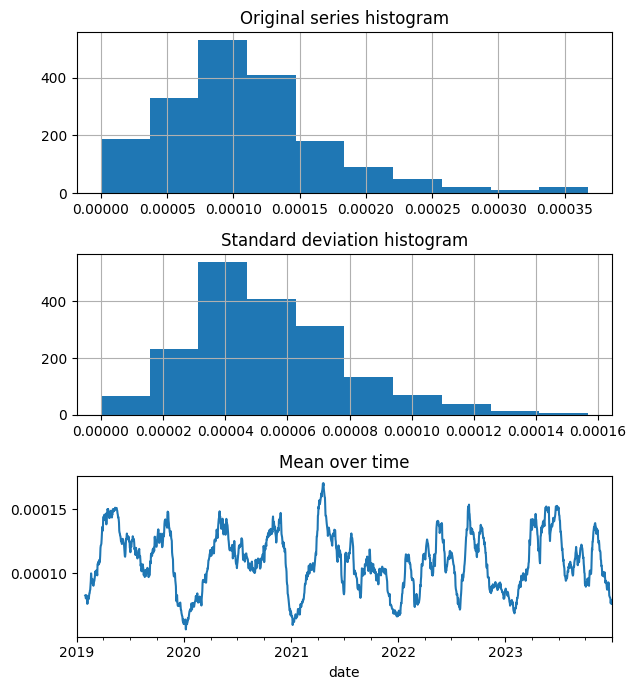

In [ ]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
hist_std_ax = plt.subplot2grid(layout, (1, 0))
mean_ax = plt.subplot2grid(layout, (2, 0))

Jaffna_data.HCHO_reading.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

mm = Jaffna_data.HCHO_reading.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = Jaffna_data.HCHO_reading.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")
plt.tight_layout()

#**PAC & AC PLOTS**


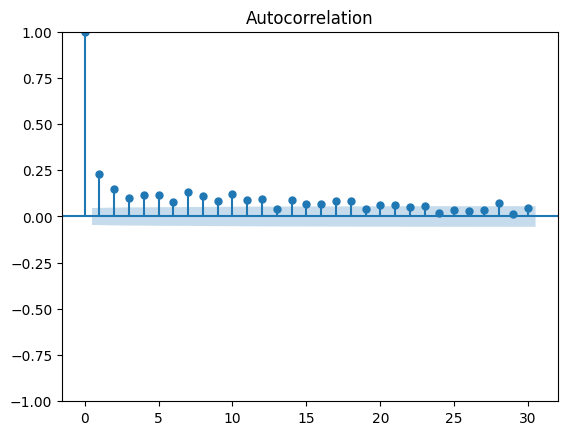

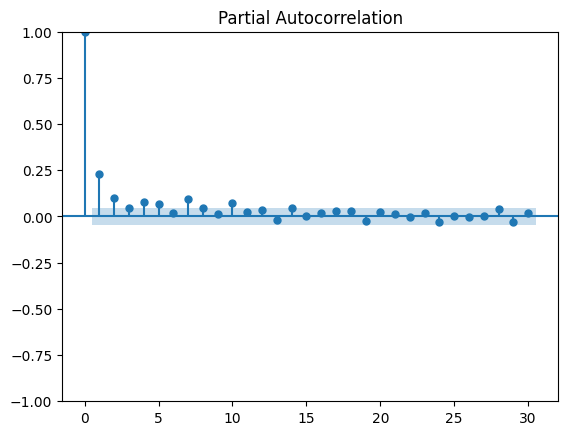

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

#**ADF TEST**


In [ ]:
from statsmodels.tsa.stattools import adfuller

X = Jaffna_data.HCHO_reading.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.240341
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
